In [1]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Devide Datset into independent and dependent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [7]:
# feature Engineering
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X["Gender"],drop_first=True)

In [8]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [9]:
# Drop feature gender and geography
X = X.drop(["Geography","Gender"],axis=1)

In [10]:
X.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57


In [11]:
# Concatenate geography and gender in to datframe
X = pd.concat([X,geography,gender],axis=1)

In [12]:
X.head(4)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0


In [13]:
# Spliting the dataset into train and test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [17]:
# Part 2
# NOW LETS CREATE ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [18]:
### Lets initialize the ANN
classifier=Sequential()

In [19]:
## Adding the input Layer and first hidden layer
classifier.add(Dense(10,input_shape=(11,),activation='relu'))

In [20]:
# adding the second hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.2))

In [21]:
##adding the third hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.3))

In [22]:
##  Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [23]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [24]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])


In [25]:
## Early Stopping
import tensorflow as tf
# early_stopping=tf.keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     min_delta = 0.0001,
#     patience=20,
#     verbose=1,
#     mode="auto",
#     baseline=None,
#     restore_best_weights=False, 
# )

## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5
   
)

In [26]:
model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 9s 5ms/step - loss: 0.4143 - accuracy: 0.8186 - val_loss: 0.3586 - val_accuracy: 0.8520
Epoch 2/100
800/800 [==============================] - 4s 5ms/step - loss: 0.3672 - accuracy: 0.8443 - val_loss: 0.3539 - val_accuracy: 0.8575
Epoch 3/100
800/800 [==============================] - 4s 5ms/step - loss: 0.3577 - accuracy: 0.8540 - val_loss: 0.3538 - val_accuracy: 0.8590
Epoch 4/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3545 - accuracy: 0.8574 - val_loss: 0.3587 - val_accuracy: 0.8545
Epoch 5/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3525 - accuracy: 0.8536 - val_loss: 0.3550 - val_accuracy: 0.8590
Epoch 6/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3503 - accuracy: 0.8546 - val_loss: 0.3488 - val_accuracy: 0.8650
Epoch 7/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3498 - accuracy: 0.8568 - val_loss: 0.3470 - val_accuracy: 0.8620

In [27]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

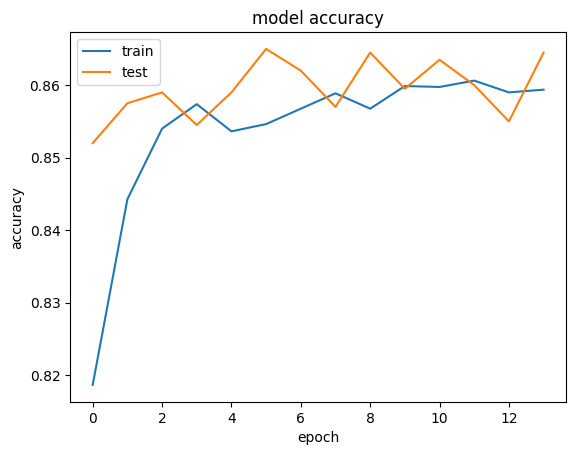

In [28]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

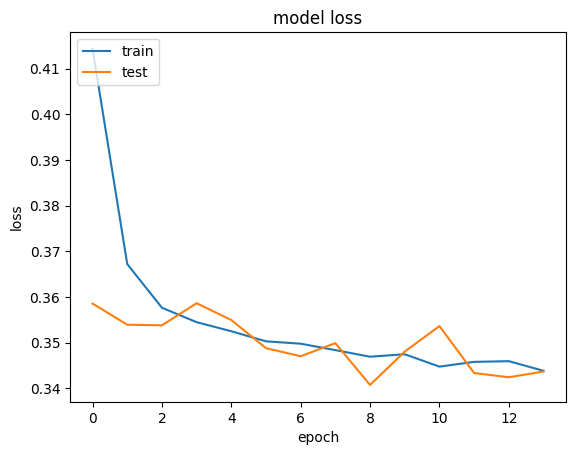

In [29]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [33]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1566,   29],
       [ 242,  163]], dtype=int64)

In [34]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [35]:
score

0.8645

In [36]:
##get the weights
classifier.get_weights()

[array([[ 0.33620346,  0.38574404,  0.01099574,  0.15795453,  0.21240845,
         -0.5284097 ,  0.45015767,  0.18653286,  0.0766384 , -0.29519603],
        [-2.777138  , -2.638925  , -2.5235844 , -0.47254416, -0.58496165,
         -0.63059986,  1.2170403 , -2.2893696 ,  1.0043341 , -2.2870622 ],
        [ 0.21853396,  0.10389642, -0.27419266, -0.00395382, -0.07503819,
         -0.32788438,  0.03768504,  0.00370366,  0.6618513 , -0.18319562],
        [-0.03801048,  0.61592066, -0.8925914 ,  0.6982034 , -1.0036772 ,
          0.4591947 , -1.2065469 , -0.09471986, -0.9188245 , -0.3968496 ],
        [ 0.09967163,  0.32243532,  0.17158428,  2.8953743 , -3.20617   ,
          1.7068362 ,  1.3072532 , -0.41458338,  0.8641872 , -0.16613701],
        [-0.07638843, -0.3460487 , -0.26302066, -0.13637096, -0.18335539,
          0.17868643,  0.4458567 ,  0.34893334,  0.20044099, -0.61023355],
        [-0.91158175,  0.46293932, -0.21474247, -0.16817445, -1.2730131 ,
         -0.24986932, -1.3332777

In [37]:
## Saving h5 file
classifier.save('model.h5')

In [38]:
##laoding h5 file
from tensorflow import keras
classifier1=keras.models.load_model('model.h5')

In [39]:
classifier1.predict(X_test)

array([[0.21188372],
       [0.3102796 ],
       [0.17482978],
       ...,
       [0.13605243],
       [0.14878106],
       [0.2216306 ]], dtype=float32)

In [40]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [44]:
# SOLVE FOR REGRESSION PROBLEM

# devide datset into independent and dependent feature

X = dataset[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited']]
y = dataset.iloc[:,12]

In [45]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0


In [46]:
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [47]:
# FEATURE ENGINEERING
from cgi import test


geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

# CONCATE THESE VARIABLE TO DATAFRAME
X = X.drop(["Geography","Gender"],axis=1)
X = pd.concat([X,geography,gender],axis=1)

# SPLITTING TRAIN TEST FOR DATASET
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Lets initialize the ANN
regressor=Sequential()

## Adding the input Layer and first hidden layer
regressor.add(Dense(10,input_shape=(11,),activation='relu'))

# adding the first hidden layer
regressor.add(Dense(units=10,activation='relu'))
#regressor.add(Dropout(0.2))

##adding the second hidden layer
regressor.add(Dense(units=10,activation='relu'))
#regressor.add(Dropout(0.3))

##  Adding the output layer
regressor.add(Dense(1))





In [49]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [51]:
import tensorflow
mse=tensorflow.keras.losses.MeanSquaredError(
    name='mean_squared_error'
)
metrics=tensorflow.keras.metrics.MeanSquaredError(
    name='mean_squared_error', dtype=None
)

In [52]:

regressor.compile(optimizer=opt,loss=mse,metrics=['mae'])

In [53]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="mae",
    patience=20
   
)

In [54]:
model_history=regressor.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 4s 4ms/step - loss: 3981112576.0000 - mae: 53130.8672 - val_loss: 3382033408.0000 - val_mae: 49800.6797
Epoch 2/100
800/800 [==============================] - 4s 5ms/step - loss: 3361514496.0000 - mae: 49907.2422 - val_loss: 3339664384.0000 - val_mae: 49675.0430
Epoch 3/100
800/800 [==============================] - 4s 5ms/step - loss: 3347223296.0000 - mae: 49878.2070 - val_loss: 3330886912.0000 - val_mae: 49728.2773
Epoch 4/100
800/800 [==============================] - 4s 5ms/step - loss: 3346288384.0000 - mae: 49874.0273 - val_loss: 3324995840.0000 - val_mae: 49614.6523
Epoch 5/100
800/800 [==============================] - 3s 4ms/step - loss: 3337759744.0000 - mae: 49836.3750 - val_loss: 3326544896.0000 - val_mae: 49647.9258
Epoch 6/100
800/800 [==============================] - 4s 4ms/step - loss: 3335731968.0000 - mae: 49805.9648 - val_loss: 3318182144.0000 - val_mae: 49598.0742
Epoch 7/100
800/800 [=========================

In [55]:
y_test


9394    192852.67
898     128702.10
2398     75732.25
5906     89368.59
2343    135662.17
          ...    
1037    180969.55
2899     70760.69
9549    141533.19
2740     11276.48
6690    192950.60
Name: EstimatedSalary, Length: 2000, dtype: float64

In [56]:
y_pred=regressor.predict(X_test)

In [57]:
y_pred


array([[104863.266],
       [107965.64 ],
       [ 91297.63 ],
       ...,
       [ 97437.44 ],
       [ 99539.06 ],
       [102289.44 ]], dtype=float32)

In [58]:
from sklearn.metrics import r2_score

In [59]:
print(r2_score(y_test,y_pred))

-0.00958957235460356
